[View in Colaboratory](https://colab.research.google.com/github/gitgash/ds-test/blob/master/ann_estimator.ipynb)

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
df = pd.read_csv("https://www.dropbox.com/s/tzb7mjxipz8fnyt/dataset.csv?dl=1")


In [0]:
# df_num_corr = df.corr()['label'][:-1]
# abs_corr = abs(df_num_corr)
# no_corr_list = abs_corr[abs_corr.isna()].index.values.tolist()
# df1 = df.drop(no_corr_list, axis=1)

In [0]:
# crete X and y
X = df.iloc[:,1:-1].copy()
y = keras.utils.to_categorical(df['label'] - 1, num_classes=5)

# divide to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3623467829)
# preprocess features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
pca = PCA(n_components=512)
pca.fit(X_train)
X_train = pca.transform(X_train)

In [87]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=512))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(X_train, y_train,
          epochs=200,
          batch_size=128)



Epoch 1/20
25312/25312 [==============================] - 4s 139us/step - loss: 1.3475 - acc: 0.4671
Epoch 2/20
25312/25312 [==============================] - 2s 99us/step - loss: 1.2883 - acc: 0.4848
Epoch 3/20
25312/25312 [==============================] - 2s 97us/step - loss: 1.2776 - acc: 0.4848
Epoch 4/20
25312/25312 [==============================] - 2s 98us/step - loss: 1.2727 - acc: 0.4857
Epoch 5/20
25312/25312 [==============================] - 2s 97us/step - loss: 1.2687 - acc: 0.4868
Epoch 6/20
25312/25312 [==============================] - 2s 95us/step - loss: 1.2652 - acc: 0.4868
Epoch 7/20
25312/25312 [==============================] - 2s 89us/step - loss: 1.2604 - acc: 0.4868
Epoch 8/20
25312/25312 [==============================] - 2s 89us/step - loss: 1.2582 - acc: 0.4871
Epoch 9/20
25312/25312 [==============================] - 2s 97us/step - loss: 1.2560 - acc: 0.4884
Epoch 10/20
25312/25312 [==============================] - 3s 99us/step - loss: 1.2503 - acc: 0.488

In [85]:
X_train.shape

(25312, 512)

In [88]:
# make prediction on test set
X_test_2 = pca.transform(scaler.transform(X_test))
# X_test_2 = scaler.transform(X_test)

y_pred = model.predict(X_test_2)
# calculate f1 weighted score
score = model.evaluate(X_test_2, y_test, batch_size=128)
print("Score = %f" % score[1])
print("F1 score %f" % f1_score(np.argmax(y_test, 1), np.argmax(y_pred, 1), average='weighted'))

2813/2813 [==============================] - 0s 163us/step
Score = 0.480981
F1 score 0.352122


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix, without normalization
[[  34    0    8    5  208]
 [  20    0    4    4  123]
 [  15    0   13   15  328]
 [  14    0    6   26  652]
 [  19    0   16   23 1280]]


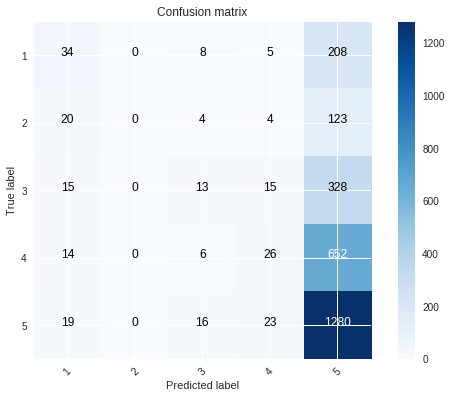

In [96]:
cnf_matrix = confusion_matrix(np.argmax(y_test, 1), np.argmax(y_pred, 1))
plot_confusion_matrix(cnf_matrix,[1,2,3,4,5])

In [91]:
np.argmax(y_test, 1).shape

(2813,)

In [93]:
np.argmax(y_pred, 1)

array([4, 4, 4, ..., 4, 4, 4])

In [0]:
dfc = df.corr()

In [67]:
abs(dfc)['label'][:-1]

f1_avg__r0       0.136920
f1_stddev__r0    0.077212
f1_min__r0       0.098829
f1_max__r0       0.097817
f2_avg__r0       0.000658
f2_stddev__r0    0.094230
f2_min__r0       0.033009
f2_max__r0       0.002254
f3_avg__r0       0.124690
f3_stddev__r0    0.135794
f3_min__r0       0.013925
f3_max__r0       0.026989
f4_avg__r0       0.180066
f4_stddev__r0    0.011091
f4_min__r0       0.104212
f4_max__r0       0.104558
f5_avg__r0       0.182397
f5_stddev__r0    0.132186
f5_min__r0       0.098281
f5_max__r0       0.025485
f6_avg__r0       0.125279
f6_stddev__r0    0.182273
f6_min__r0       0.046353
f6_max__r0       0.063069
f7_avg__r0       0.226745
f7_stddev__r0    0.091248
f7_min__r0       0.134928
f7_max__r0       0.152783
f8_avg__r0       0.118896
f8_stddev__r0    0.130709
                   ...   
f18_q7__r4            NaN
f18_q8__r4            NaN
f18_q9__r4            NaN
f19_q1__r4       0.150068
f19_q2__r4       0.153669
f19_q3__r4       0.158252
f19_q4__r4       0.155709
f19_q5__r4  